In [11]:
import numpy as np
from astropy.table import Table
from astropy.io import ascii
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from scipy.constants import c, au

In [12]:
"""
colourblind-safe colours
"""
COLORS = (
    '#000000',
    '#0072b2',
    '#56b4e9',
    '#009e73',
    '#cc79a7',
    '#d55e00',
    '#e69f00',
    '#f0e442')


In [13]:
t = Table.read("dr2_average_z.vot", format="votable")
print len(t)

1005


In [14]:
peaked = t[~t.mask['nu_p']]
low_peak = t[t['peak_below_72mhz']]
gps = t[t['gps']]
#FIXME add nominal n_p values to other sources.

In [15]:
gps['nu_p'] = 1000.*np.ones([len(gps)])
low_peak['nu_p'] = 72.*np.ones([len(low_peak)])

In [16]:
print "%d MHz-peaked sources of which %d have redshifts" % (len(peaked), sum(~peaked.mask['z']))
print "%d low-peaking (<72MHz) sources of which %d have redshifts" % (len(low_peak), sum(~low_peak.mask['z']))
print "%d gps sources of which %d have redshifts" % (len(gps), sum(~gps.mask['z']))

76 MHz-peaked sources of which 15 have redshifts
5 low-peaking (<72MHz) sources of which 0 have redshifts
7 gps sources of which 5 have redshifts


In [17]:
print gps.colnames
print gps['GLEAM', 'n_obs', 'nsi', 'err_nsi', 'spread_nsi', 'z']
print low_peak['GLEAM', 'n_obs', 'nsi', 'err_nsi', 'spread_nsi', 'z']

['Source_name_tgss', 'GLEAM', 'RA_tgss', 'elongation', 'n_obs', 'nsi', 'err_nsi', 'spread_nsi', 'peaked', 'gps', 'peak_below_72mhz', 'convex', 'flat', 'S_p', 'S_p_error', 'nu_p', 'nu_p_error', 'q', 'q_error', 'z', 'z_ref', 'Fp080', 'Fp162']
    GLEAM      n_obs        nsi         ...      spread_nsi         z    
-------------- ----- ------------------ ... -------------------- --------
J024008-230911   2.0 0.9832157176498563 ... 0.027386790279583573    2.223
J021044+041928   3.0 1.6546957513817158 ...  0.07752917979074155       --
J014922+055552   3.0 1.5792294391964596 ...  0.08157007754736323    2.345
J012528-000557   4.0  1.254833750964455 ...   0.1159147424095379 1.074807
J010551+155337   1.0  1.654853098114085 ...                   --       --
J002225+001452   3.0 1.2688722088999214 ...   0.1212404750231988    0.305
J001611-001510   2.0 1.3631454219542398 ...  0.17047663876010433  1.57631
    GLEAM      n_obs        nsi         ...      spread_nsi      z 
-------------- ----- ----

(0.3376269056707423, 0.002857235151432327)
(0.360384674577402, 0.005050013926538162)
0.11647918525179016 0.0310213722846308
0.26821614495847873 0.019677263013615887


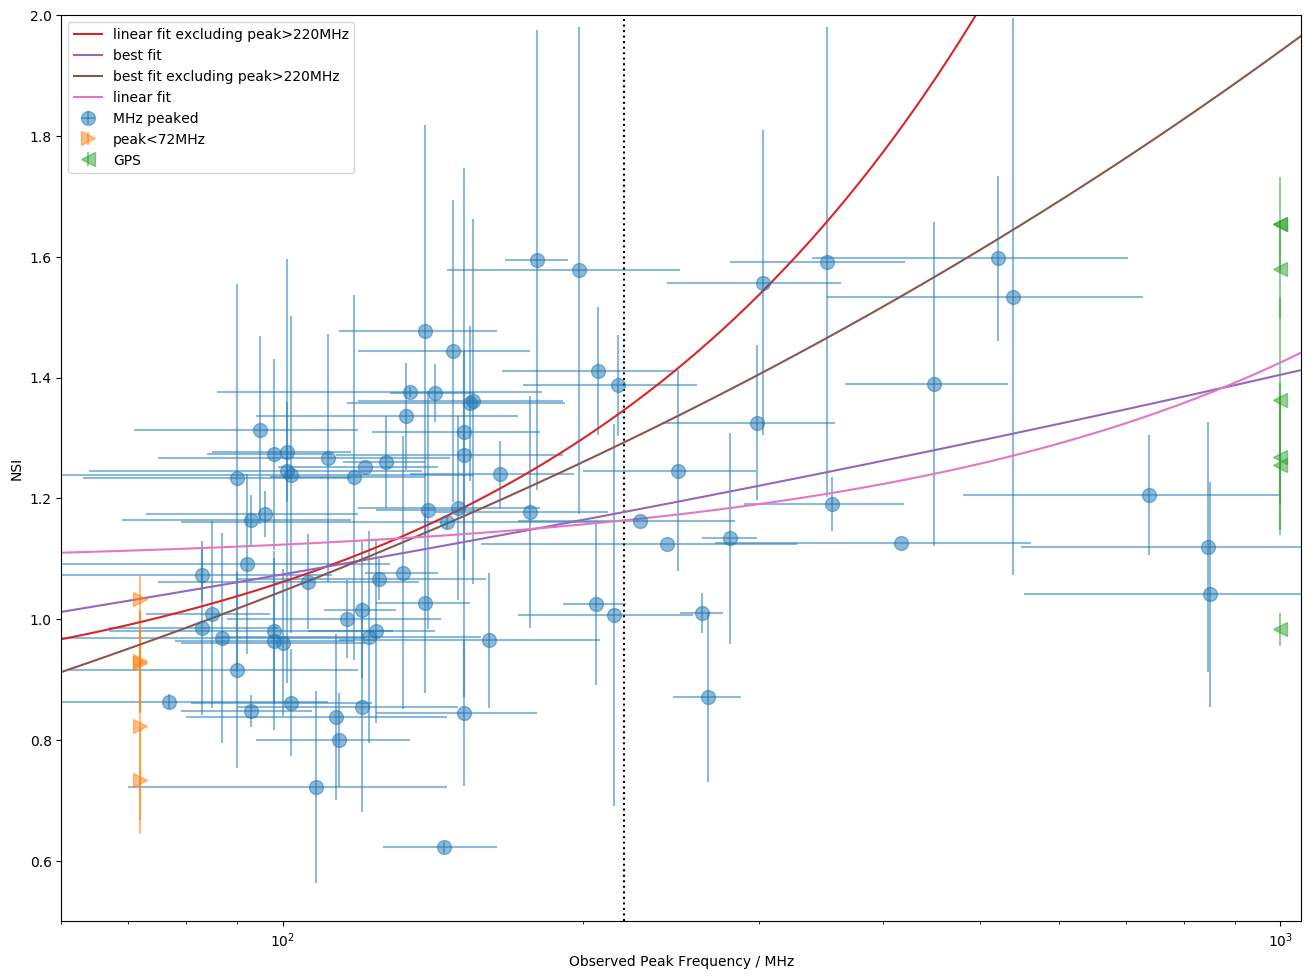

In [18]:
# FIXME add Jitter for low-peak and gps sources.
xlim = [60, 1050]
x = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 200)
plt.figure(figsize=(16.0, 12.0))
plt.errorbar(peaked['nu_p'], peaked['nsi'], peaked['spread_nsi'], peaked['nu_p_error'], 'o', markersize=10, alpha=0.5, label="MHz peaked")
plt.errorbar(low_peak['nu_p'], low_peak['nsi'], low_peak['spread_nsi'], fmt='>', markersize=10, alpha=0.5, label="peak<72MHz")
plt.errorbar(gps['nu_p'], gps['nsi'], gps['spread_nsi'], fmt='<', markersize=10, alpha=0.5, label="GPS")
plt.axvline(220, linestyle=':', color='black')
plt.xscale('log')
plt.xlim(60, 1050)
plt.ylim(0.5, 2)
plt.xlabel("Observed Peak Frequency / MHz")
plt.ylabel("NSI")
#curve_fit?
print pearsonr(np.log10(peaked['nu_p']), np.log10(peaked['nsi']))
lt220 = peaked['nu_p']<220
print pearsonr(np.log10(peaked['nu_p'][lt220]), np.log10(peaked['nsi'][lt220]))
#line_func = lambda x, m, c: m*x + c
m0, c0 =  np.polyfit(np.array(peaked['nu_p'][lt220], dtype=np.float),
                     np.array(peaked['nsi'][lt220], dtype=np.float), deg=1)

m3, c3 =  np.polyfit(np.array(peaked['nu_p'], dtype=np.float),
                     np.array(peaked['nsi'], dtype=np.float), deg=1)

m1, c1 =  np.polyfit(np.log10(np.array(peaked['nu_p'], dtype=np.float)) - 2,
                     np.log10(np.array(peaked['nsi'], dtype=np.float)), deg=1)

m2, c2 = np.polyfit(np.log10(np.array(peaked['nu_p'][lt220]), dtype=np.float) - 2,
                    np.log10(np.array(peaked['nsi'][lt220], dtype=np.float)), deg=1)
print m1, c1
print m2, c2
plt.plot(x, m0*x + c0, label="linear fit excluding peak>220MHz")
plt.plot(x, 10**(c1)*(x/100)**m1, label="best fit")
plt.plot(x, 10**(c2)*(x/100)**m2, label="best fit excluding peak>220MHz")
plt.plot(x, m3*x + c3, label="linear fit")

plt.legend()

(0.3376269056707423, 0.002857235151432327)
(0.360384674577402, 0.005050013926538162)
0.11647918525179016 0.0310213722846308
0.26821614495847873 0.019677263013615887


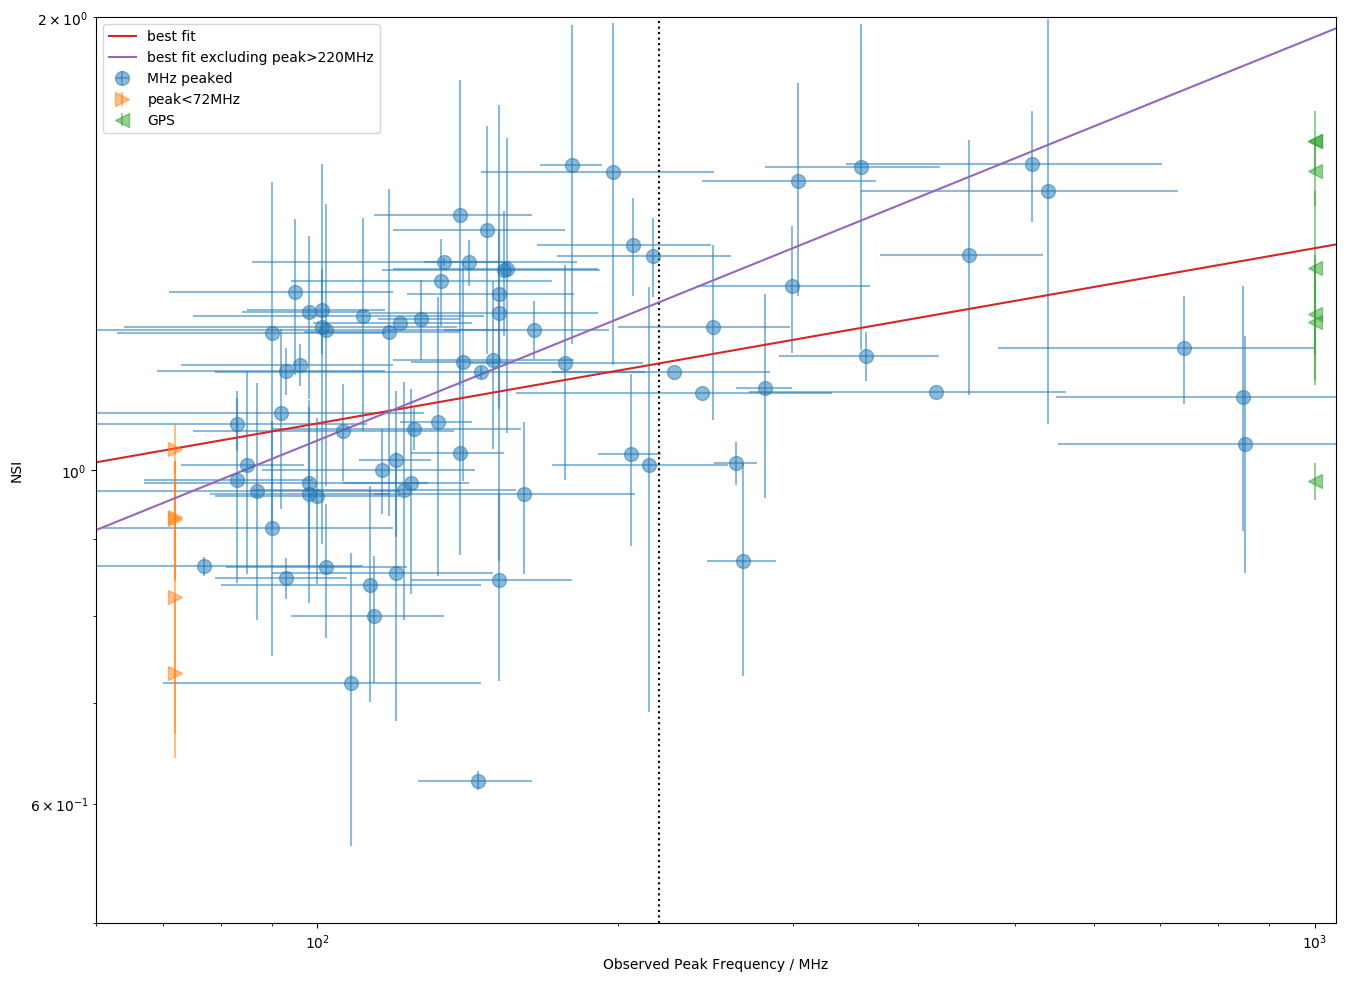

In [19]:
# FIXME add Jitter for low-peak and gps sources.
xlim = [60, 1050]
x = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 200)
plt.figure(figsize=(16.0, 12.0))
plt.errorbar(peaked['nu_p'], peaked['nsi'], peaked['spread_nsi'], peaked['nu_p_error'], 'o', markersize=10, alpha=0.5, label="MHz peaked")
plt.errorbar(low_peak['nu_p'], low_peak['nsi'], low_peak['spread_nsi'], fmt='>', markersize=10, alpha=0.5, label="peak<72MHz")
plt.errorbar(gps['nu_p'], gps['nsi'], gps['spread_nsi'], fmt='<', markersize=10, alpha=0.5, label="GPS")
plt.axvline(220, linestyle=':', color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlim(60, 1050)
plt.ylim(0.5, 2)
plt.xlabel("Observed Peak Frequency / MHz")
plt.ylabel("NSI")
#curve_fit?
print pearsonr(np.log10(peaked['nu_p']), np.log10(peaked['nsi']))
lt220 = peaked['nu_p']<220
print pearsonr(np.log10(peaked['nu_p'][lt220]), np.log10(peaked['nsi'][lt220]))
#line_func = lambda x, m, c: m*x + c
m1, c1 =  np.polyfit(np.log10(np.array(peaked['nu_p'], dtype=np.float)) - 2,
                     np.log10(np.array(peaked['nsi'], dtype=np.float)), deg=1)
m2, c2 = np.polyfit(np.log10(np.array(peaked['nu_p'][lt220]), dtype=np.float) - 2,
                    np.log10(np.array(peaked['nsi'][lt220], dtype=np.float)), deg=1)
print m1, c1
print m2, c2
plt.plot(x, 10**(c1)*(x/100)**m1, label="best fit")
plt.plot(x, 10**(c2)*(x/100)**m2, label="best fit excluding peak>220MHz")
plt.legend()

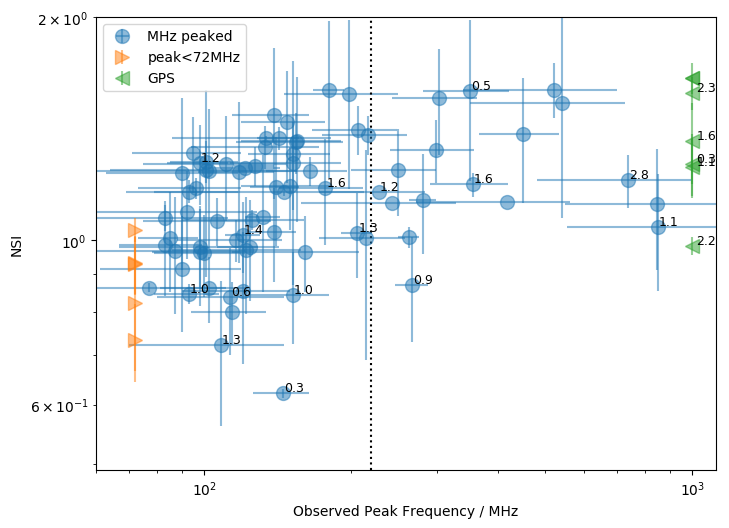

In [20]:
# FIXME add Jitter for low-peak and gps sources.
xlim = [60, 1120]
x = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 200)
z_p = ~peaked['z'].mask
z_g = ~gps['z'].mask
#print len(peaked['nu_p'][z_p])
#print peaked['nu_p'][z_p]
#print peaked['nsi'][z_p]
#print ["%.1f" % z for z in peaked['z'][z_p]]

plt.figure(figsize=(8.0, 6.0))
plt.errorbar(peaked['nu_p'], peaked['nsi'], peaked['spread_nsi'], peaked['nu_p_error'], 'o', markersize=10, alpha=0.5, label="MHz peaked")
plt.errorbar(low_peak['nu_p'], low_peak['nsi'], low_peak['spread_nsi'], fmt='>', markersize=10, alpha=0.5, label="peak<72MHz")
plt.errorbar(gps['nu_p'], gps['nsi'], gps['spread_nsi'], fmt='<', markersize=10, alpha=0.5, label="GPS")

for i in range(sum(z_p)):
    plt.text(peaked['nu_p'][z_p][i]*1.005, peaked['nsi'][z_p][i]*1.005, "%.1f" % peaked['z'][z_p][i], fontsize=9)
for i in range(sum(z_g)):
    plt.text(1020, gps['nsi'][z_g][i]*1.005, "%.1f" % gps['z'][z_g][i], fontsize=9)

plt.axvline(220, linestyle=':', color='black')
plt.xscale('log')
plt.yscale('log')
#plt.gca().yaxis.set_major_locator(plt.NullLocator())
#plt.yticks([])
#ax = plt.axes()
#ax.set_yticklabels(["0.6", "1.0", "2.0"])
#plt.yticks((0.5, 1, 2), ("0.5", "1.0", "2.0"))

plt.xlim(xlim[0], xlim[1])
plt.ylim(0.49, 2)
plt.xlabel("Observed Peak Frequency / MHz")
plt.ylabel("NSI")
plt.legend()
plt.savefig("ObsPeakedNSI.pdf")

(72, 1000)

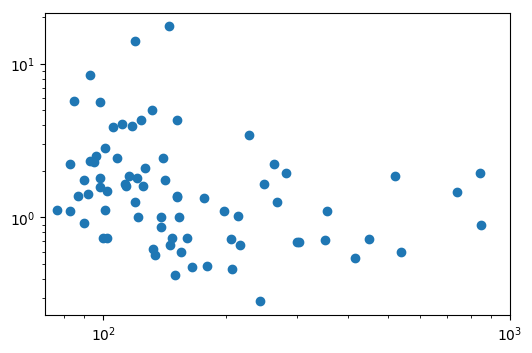

In [21]:
plt.loglog(peaked['nu_p'], peaked['S_p'], 'o')
#plt.ylim(0, 4)
plt.xlim(72, 1000)

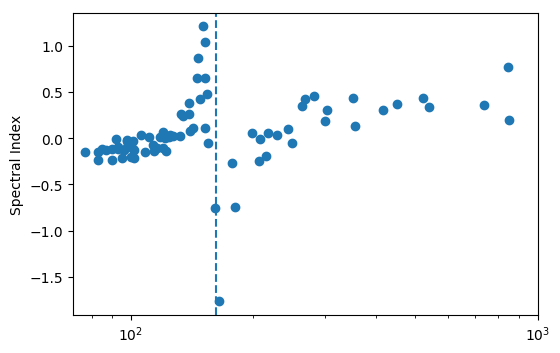

In [22]:
alpha =np.log(peaked['S_p']/peaked['Fp162'])/np.log(peaked['nu_p']/162.)

plt.semilogx(peaked['nu_p'], alpha, 'o')
plt.axvline(162., linestyle='--')
plt.xlim(72, 1000)
#plt.xlabel("Observed Peak/MHz")
plt.ylabel("Spectral Index")
plt.savefig("spectra_index.pdf")

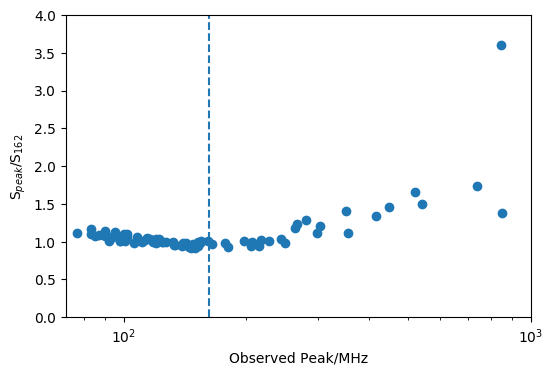

In [23]:
plt.semilogx(peaked['nu_p'], peaked['S_p']/peaked['Fp162'], 'o')
plt.axvline(162., linestyle='--')
plt.ylim(0, 4)
plt.xlim(72, 1000)
plt.xlabel("Observed Peak/MHz")
plt.ylabel("S$_{\mathit{peak}}$/S$_{162}$")
plt.savefig("ratio.pdf")

(0, 1.7)

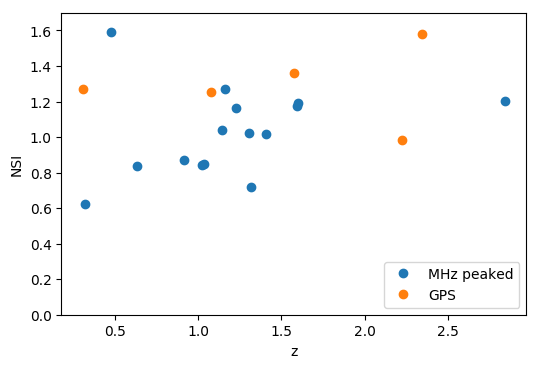

In [24]:
peaked_z = peaked['nsi', 'z'][~peaked.mask['z']]
gps_z = gps['nsi', 'z'][~gps.mask['z']]

plt.plot(peaked_z['z'], peaked_z['nsi'], 'o', label='MHz peaked')
plt.plot(gps_z['z'], gps_z['nsi'], 'o', label='GPS')
plt.xlabel("z")
plt.ylabel("NSI")
plt.legend(loc='lower right')
plt.ylim(0, 1.7)

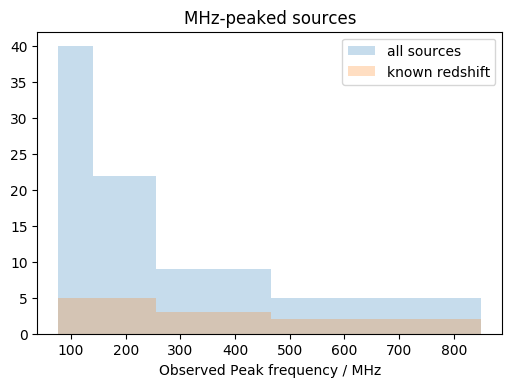

In [25]:
bins=np.logspace(np.log10(peaked['nu_p'].min()), np.log10(peaked['nu_p'].max()), 5)
_, _, _ = plt.hist(peaked['nu_p'], bins=bins, alpha=0.25, label='all sources')
_, _, _ = plt.hist(peaked['nu_p'][~peaked.mask['z']], bins=bins, alpha=0.25, label='known redshift')
plt.legend()
plt.title("MHz-peaked sources")
plt.xlabel("Observed Peak frequency / MHz")
plt.savefig("peaked_known_redshift.pdf")

There are far larger numbers of sources with lower peak frequency, however the number of peaked sources with known redshift barely changes with peak frequency; i.e. the fraction of peaked sources with known redshift drops steeply with peaked frequency. Note also that 5/7 GPS sources have redshifts.

Let's give the sources of unknown redshift the nominal redshift of 1.86 (Sadler 2018) and instead plot rest-frame peak frequency

In [26]:
low_peak['z'] = 1.86
peaked['z'][~z_p] = 1.86
gps['z'][~z_g] = 1.86

low_peak['nu_p_rest'] = low_peak['nu_p']*(1+low_peak['z'])
peaked['nu_p_rest'] = peaked['nu_p']*(1+peaked['z'])
gps['nu_p_rest'] = gps['nu_p']*(1+gps['z'])

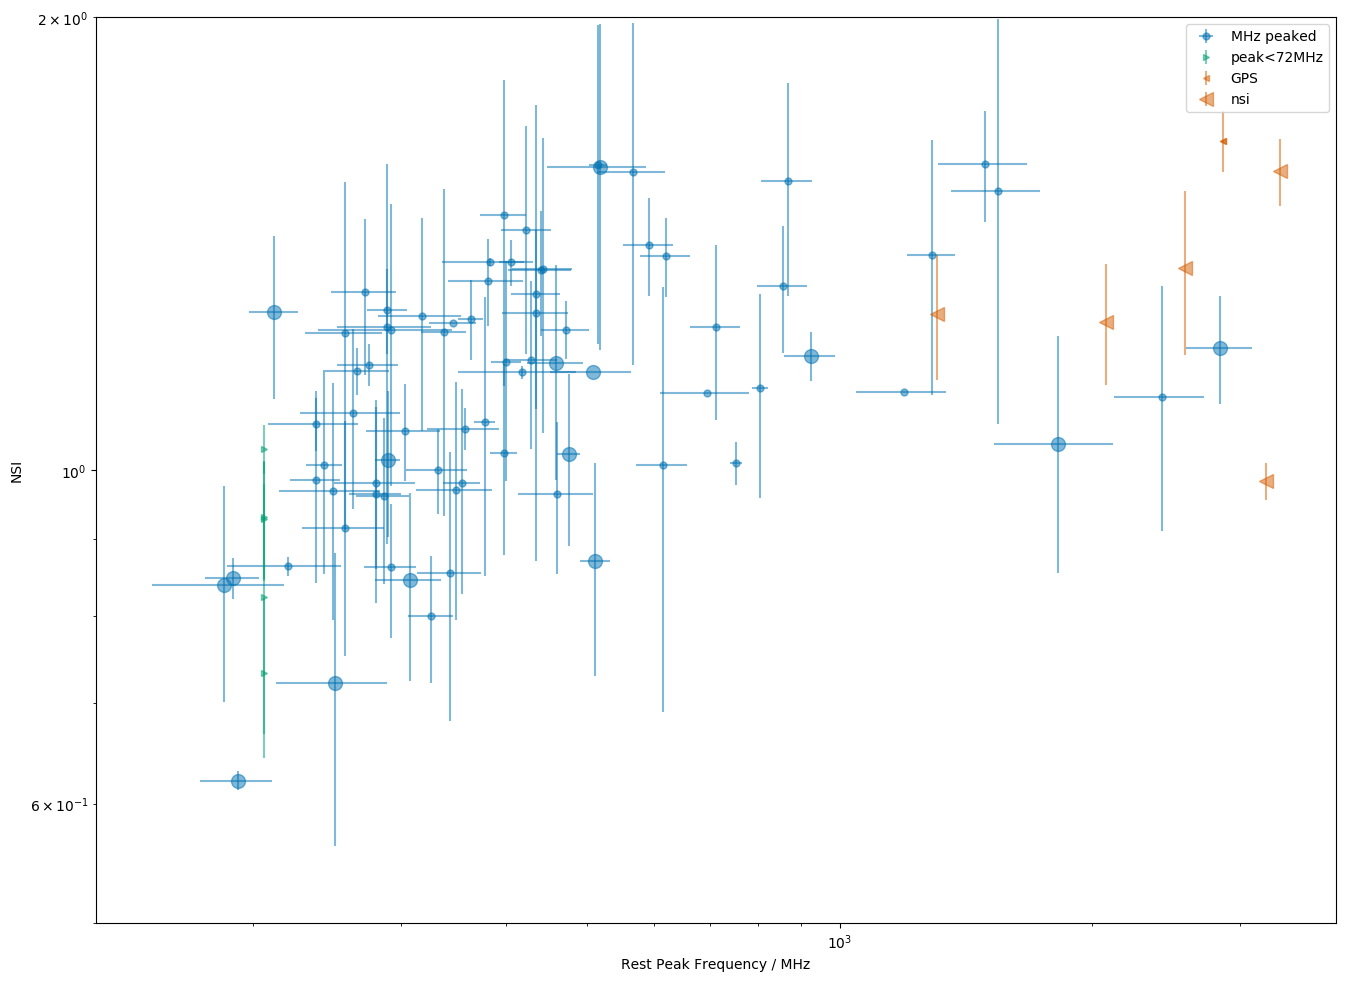

In [27]:
# FIXME add Jitter for low-peak and gps sources.
xlim = [60, 1120]
x = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 200)

plt.figure(figsize=(16.0, 12.0))
plt.errorbar(peaked['nu_p_rest'][~z_p], peaked['nsi'][~z_p], peaked['spread_nsi'][~z_p], peaked['nu_p_error'][~z_p], 'o', markersize=5, alpha=0.5, label="MHz peaked", color=COLORS[1])
plt.errorbar(low_peak['nu_p_rest'], low_peak['nsi'], low_peak['spread_nsi'], fmt='>', markersize=5, alpha=0.5, label="peak<72MHz", color=COLORS[3])
plt.errorbar(gps['nu_p_rest'][~z_g], gps['nsi'][~z_g], gps['spread_nsi'][~z_g], fmt='<', markersize=5, alpha=0.5, label="GPS", color=COLORS[5])

plt.errorbar(peaked['nu_p_rest'][z_p], peaked['nsi'][z_p], peaked['spread_nsi'][z_p], peaked['nu_p_error'][z_p], 'o', markersize=10, alpha=0.5, label="MHz peaked", color=COLORS[1])
plt.errorbar(gps['nu_p_rest'][z_g], gps['nsi'][z_g], gps['spread_nsi'][z_g], fmt='<', markersize=10, alpha=0.5, color=COLORS[5])


#for i in range(sum(z_p)):
#    plt.text(peaked['nu_p'][z_p][i], peaked['nsi'][z_p][i], "%.1f" % peaked['z'][z_p][i], fontsize=20)
#for i in range(sum(z_g)):
#    plt.text(1000, gps['nsi'][z_g][i], "%.1f" % gps['z'][z_g][i], fontsize=20)

#plt.axvline(220, linestyle=':', color='black')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(xlim[0], xlim[1])
plt.ylim(0.5, 2)
plt.xlabel("Rest Peak Frequency / MHz")
plt.ylabel("NSI")
plt.legend()

Next we need to change the NSI to some kind of linear size. For this we'll use Goodman & Narayan

In [28]:
def rickett(l, p):
    '''
    return m_pt given lambda and p
    '''
    return (0.06*l*p**-1.6)

def pt(u):
    """
    GN06 eqn 24
    """
    return (0.7729*u/(1+0.286*u+0.086*u**2+0.055*u**3))+(1+0.476*u**-0.4)/(1-1.64*u**-1+10.1*u**-2)

get_a1 = lambda u: np.hypot(1.01, 0.747*u) # 33
get_a2 = lambda u: np.hypot(11.9*u**1.02, 5.37*u**2.4) # 34

def get_diffractive(u, r, rs, eta, u0, c1, c2, r5):
    r4 = c2*r5 # 31
    r3 = np.sqrt(r5**2 + c1*rs**2) # 30
    r2 = r4 + 3.54*eta**1.12/r4**1.09 # 29
    r1 = r3 + 3.54*eta**1.12/r3**1.09 # 28
    f_s = (1+(rs/r2)**1.81)**-1 # 25
    f_r = np.exp(-(r/r1)**(5/3.)) # 24
    return r1, r2, r3, r4, f_s, f_r

def goodman(u, r=0.0, rs=0.0, eta=0.0, shape=None):
    """
    returns the 
    u is the scattering parameter - GN06 eqn 6
    eta is frequency difference l2-l1/(l1+l2) - GN06 eqn 5
    r is spatial separation (of the receivers) 
    rs is the source size - GN06 eqn 15-18
    GN06 states that distances are given in terms of r_f unless otherwise stated - para below ean 6
    """

    u0 = 1.5874 # 22

    if shape=='tophat':
        c1=0.829 # 36
        c2=1.32 # 36
    else:
        # Gaussian
        c1=1.37 # 35
        c2=0.965 # 35
    
    a2 = get_a2(u)
    a1 = get_a1(u)
    zeta = eta/(1-eta) # 27
    f_eta = (1 + a1*zeta**(5/6.) + a2*zeta**2)**-1 # 26
    if np.any(u < u0):
        # weak scattering
        r5 = 1.15-0.26*(u/u0)**0.73 # weak scattering only 32
        r1, r2, r3, r4, f_s, f_r = get_diffractive(u, r, rs, eta, u0, c1, c2, r5)

        # weak scattering
        m = np.where(u<u0, pt(u)*f_r*f_s*f_eta, None)
    else:
        m=None
    if np.any(u>=u0):
        # strong scattering
        r5 = (0.964*u**-0.6)+(0.89-0.964*u**-0.6)*(u0/u)**1.19 # strong scattering only 40
        r1, r2, r3, r4, f_s, f_r = get_diffractive(u, r, rs, eta, u0, c1, c2, r5)

        a4 = 8.38 + (get_a2(u0)-8.38)*(u0/u)**0.933 # 50
        a3 = get_a1(u0)*(u0/u)**0.567 # 49
        r10 = 1.2 - 2.0*u**0.3 + 1.73*u**0.6 # 48
        r9 = c2*r10 # 47
        r8 = np.sqrt(r10**2 + c1*rs**2) # 46
        r7 = r9 + 15.1*eta**1.48 # 45
        r6 = r8 + 15.1*eta**1.48 # 44
        f_r_r = np.exp(-(r/r6)**(7/3.)) # 41
        f_s_r = (1.0+(rs/r7)**(7/3.))**-1 # 42
        f_eta_r = (1.0+a3*zeta**(5/6.) + a4*zeta**2)**-1 # 43
        w_d = (pt(u)+1)/2 # 38
        w_r = (pt(u)-1)/2 # 38
        m = np.where(u>=u0, w_d*f_r*f_s*f_eta + w_r*f_r_r*f_s_r*f_eta_r, m)
        #m = np.where(u>=u0, w_r*f_r_r*f_s_r*f_eta_r, m)
        #m = np.where(u>=u0, w_d*f_r*f_s*f_eta, m)
    return m/0.7729 # see GN06 section 4.5
    
def get_fresnel(elongation, l, l2=None):
    """
    get fresnel size in arcseconds given wavelength and elongation in degrees
    
    assumes the scattering screen is at the piercepoint (point of closest approach to the Sun)
    
    See GN06 for definition of Fresnel scale for dual-frequency observations
    """
    if not l2:
        return 3600*np.degrees(np.sqrt(l/(2*np.pi*au*np.cos(np.radians(elongation)))))
    else:
        return 3600*np.degrees(np.sqrt((l+l2)/(4*np.pi*au*np.cos(np.radians(elongation)))))

This may be slightly solar elongation dependent. However to begin with, let's assume an impact factor of 0.6 AU (around 37 degrees). This implies a Fresnel Scale of

In [29]:
p = 0.6
l = c/161e6
elongation = np.degrees(np.arcsin(0.6))
print get_fresnel(elongation, l)

0.32458235948179087


We also need to decide on a source model. For now, we'll assume a double with equal components.

Following Goodman&Narayan, we need to define $C_1$ and $C_2$ in terms of approximate relationships given in section 4.2 (equation 37). See also discussion at the end of section 3 (equation 17). Depends on $r_s$ and $r_{\mathit{rms}}$. The latter is most easily visualised as the square root of the moment of inertia of a solid model of the 2D sky brightness distribution.

For an equal double, these parameters are the same as for a circular Gaussian.

For an unequal double of separation things will be slightly more complicated.

**Note that $r_s$ is the source radius!!**

There is clearly some enhanced scattering as the NSIs exceed 1. We'll take this enhancement $g$ to be 1.4

In [30]:
g=1.6
print c/161e6

1.86206495652


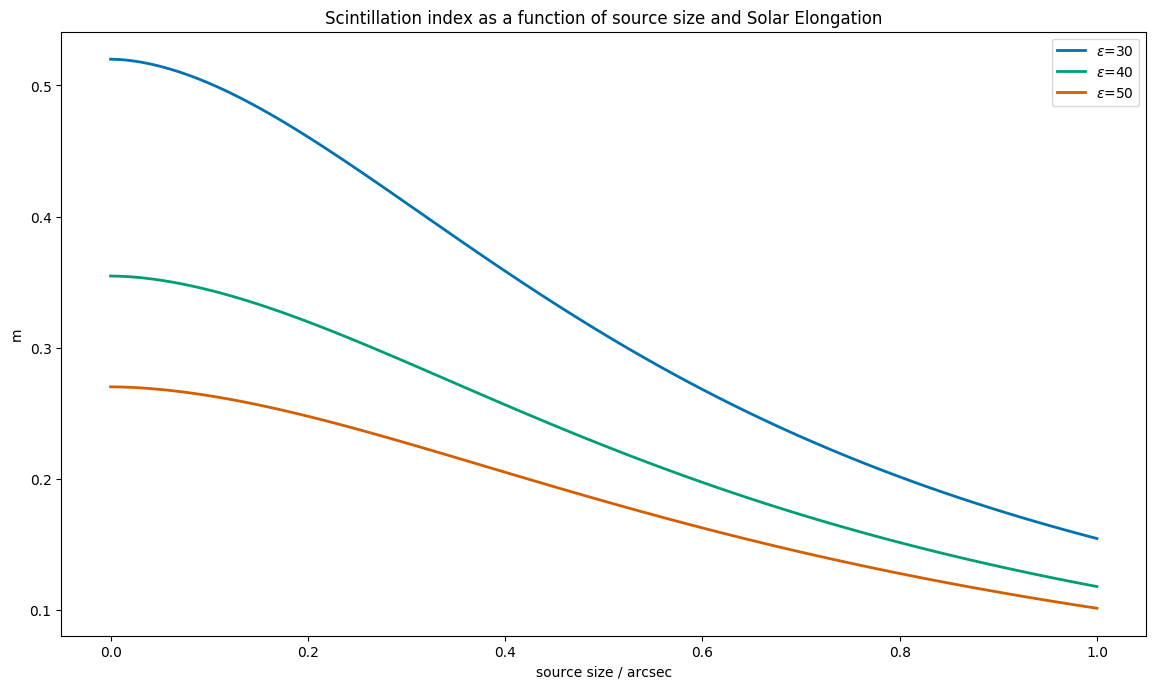

In [31]:
plt.figure(figsize=(14, 8))

size = np.linspace(0, 1, 100)
for e, elongation in enumerate((30, 40, 50)):
    p = np.sin(np.radians(elongation))
    plt.plot(size, goodman(g*rickett(l, p), rs=size/2/get_fresnel(elongation, l)), color=COLORS[2*e+1], linewidth=2, label='$\epsilon$=%d' % elongation)
plt.title("Scintillation index as a function of source size and Solar Elongation")
plt.xlabel("source size / arcsec")
plt.ylabel("m")
plt.legend()

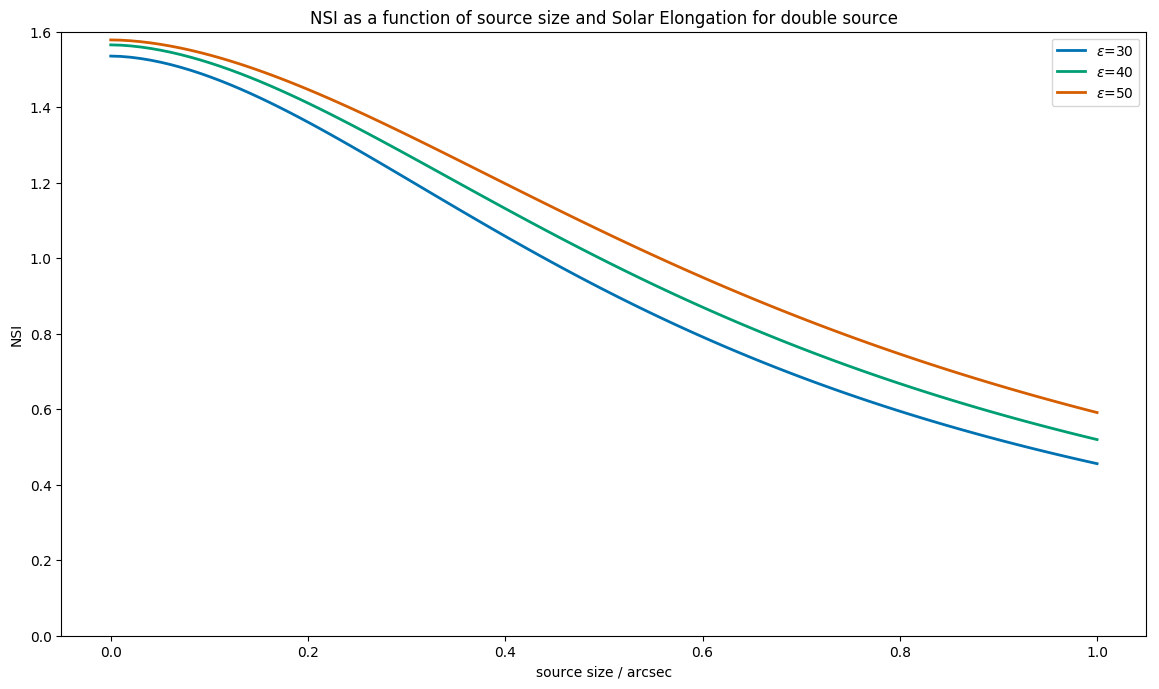

In [32]:
plt.figure(figsize=(14, 8))

size = np.linspace(0, 1, 100)
for e, elongation in enumerate((30, 40, 50)):
    p = np.sin(np.radians(elongation))
    m_rickett = rickett(l, p)
    plt.plot(size, goodman(g*m_rickett, rs=size/2/get_fresnel(elongation, l))/m_rickett, color=COLORS[2*e+1], linewidth=2, label='$\epsilon$=%d' % elongation)
plt.title("NSI as a function of source size and Solar Elongation for double source")
plt.xlabel("source size / arcsec")
plt.ylabel("NSI")
plt.ylim(0, 1.6)
plt.legend()
plt.savefig("NSI.pdf")

The relationship doesn't change a huge amount with solar elongation which is encouraging.

We will use an elongation of 40, and we will assign a nominal source size of 0.2" to any source smaller than that.

Don't really want to invert Goodman & Narayan's fitting function, so let's do this as a look-up table!!

In [33]:
g=1.6
l=c/161e6
p=0.6
elongation=np.degrees(np.arcsin(p))
m_rickett = rickett(l, p)
sizes = np.linspace(1.0, 0.0, 101)
nsis = np.float64(goodman(g*m_rickett, rs=sizes/2/get_fresnel(elongation, l))/m_rickett) # these *must* be increasing!
print nsis[0]
print sizes[0]
print nsis[-1]
print sizes[-1]

0.4996112218728211
1.0
1.558492578772474
0.0


In [34]:
def nsi_to_size(nsi, cutoff=0.2):
    s = np.interp(nsi, nsis, sizes)
    return np.where(s>cutoff, s, cutoff)

print nsi_to_size(np.linspace(1.6, 0.6, 11))

[0.2        0.2        0.2        0.2705212  0.33875121 0.40719196
 0.47863743 0.55566792 0.64119801 0.73917247 0.85541627]


In [35]:
peaked['angular_size'] = nsi_to_size(peaked['nsi'])
gps['angular_size'] = nsi_to_size(gps['nsi'])
low_peak['angular_size'] = nsi_to_size(low_peak['nsi'])

Finally we convert from angular size to physical size. We can use a lookup table for this too, downloaded from http://cosmocalc.icrar.org/

In [36]:
tab = np.loadtxt(open("cosmocalc.csv", "rb"), delimiter=",", skiprows=1)
zs = tab[:, 0]
arcsec_to_kpc = tab[:, 7]

Apart from very nearby objects, we can only really probe sizes from about 1kpc to about 8.

In [37]:
#NB table is in reverse order!
get_linear_scale = lambda z, size: size*np.interp(z, zs[::-1], arcsec_to_kpc[::-1])

print zs[0]
print arcsec_to_kpc[0]
print zs[-1]
print arcsec_to_kpc[-1]

5.0
6.28267665315971
0.0
0.0


In [38]:
print get_linear_scale(0.001, 2)

0.040613663852


In [39]:
peaked['linear_size'] = get_linear_scale(peaked['z'], peaked['angular_size'])
gps['linear_size'] = get_linear_scale(gps['z'], gps['angular_size'])
low_peak['linear_size'] = get_linear_scale(low_peak['z'], low_peak['angular_size'])

In [40]:
s_p = peaked['angular_size'] != 0.2
s_g = gps['angular_size'] != 0.2
s_l = low_peak['angular_size'] != 0.2

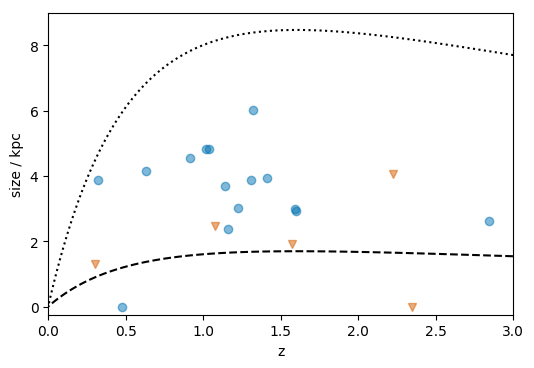

In [43]:
plt.plot(zs, 0.2*arcsec_to_kpc, linestyle='--', color='black')
plt.plot(zs, 1.0*arcsec_to_kpc, linestyle=':', color='black')
plt.plot(peaked['z'][z_p], get_linear_scale(peaked['z'][z_p], nsi_to_size(peaked['nsi'][z_p], 0.0)), 'o', color=COLORS[1], alpha=0.5)
plt.plot(gps['z'][z_g], get_linear_scale(gps['z'][z_g], nsi_to_size(gps['nsi'][z_g], 0.0)), 'v', color=COLORS[5], alpha=0.5)
plt.xlim(0.,3.)
plt.ylim(-0.25,9.)

plt.xlabel("z")
plt.ylabel("size / kpc")
plt.savefig("ang_scale.pdf")

(array([  0.1,   1. ,  10. , 100. ]), <a list of 4 Text xticklabel objects>)

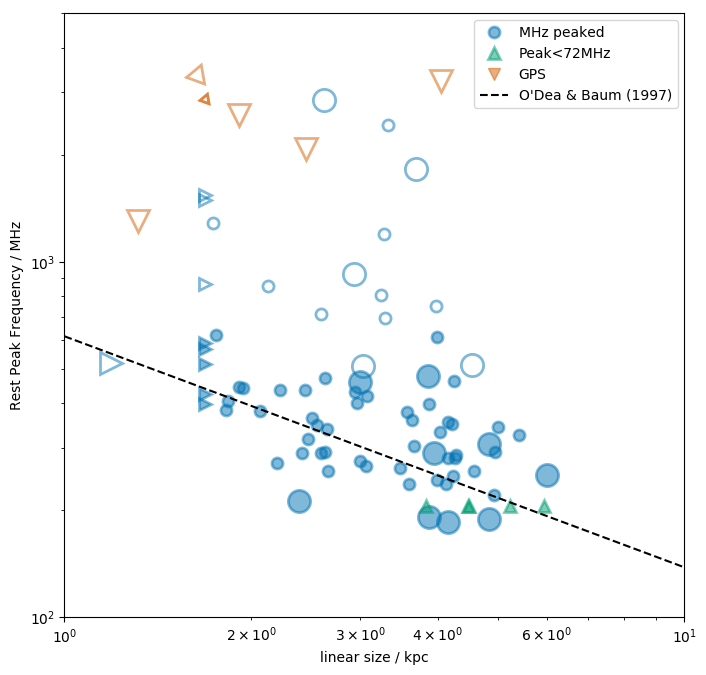

In [44]:
xlim = [1, 10]
ylim = [100, 5e3]
x = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 200)

bigsize=16
smallsize=8
markeredgewidth=2
plt.figure(figsize=(8.0, 8.0))

# known z, not size upper limit
filt = z_p & s_p & lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], 'o', markersize=bigsize, alpha=0.5, 
         label='_nolegend_', color=COLORS[1], markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = z_p & s_p & ~lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], 'o', markersize=bigsize, alpha=0.5, 
         label='_nolegend_', color='none', markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)

filt = z_g & s_g
plt.plot(gps['linear_size'][filt], gps['nu_p_rest'][filt], 'v', markersize=bigsize, alpha=0.5,
         label='_nolegend_', color='none', markeredgecolor=COLORS[5], markeredgewidth=markeredgewidth)


#unknown z, not size upper limit
filt = ~z_p & s_p & lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], 'o', markersize=smallsize, alpha=0.5, 
         label="MHz peaked", color=COLORS[1], markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = ~z_p & s_p & ~lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], 'o', markersize=smallsize, alpha=0.5, 
         label="_nolegend_", color='none', markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = s_l
plt.plot(low_peak['linear_size'][filt], low_peak['nu_p_rest'][filt], '^', markersize=smallsize, alpha=0.5,
         label="Peak<72MHz", color=COLORS[3], markeredgecolor=COLORS[3], markeredgewidth=markeredgewidth)
filt = ~z_g & s_g
plt.plot(gps['linear_size'][filt], gps['nu_p_rest'][filt], 'v', markersize=smallsize, alpha=0.5,
         label="GPS", color=COLORS[5], markeredgecolor=COLORS[5])

# known z, size upper limit
filt = z_p & ~s_p & lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], '>', markersize=bigsize, alpha=0.5, 
        label='_nolegend_', color=COLORS[1], markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = z_p & ~s_p & ~lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], '>', markersize=bigsize, alpha=0.5, 
        label='_nolegend_', color='none', markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = z_g & ~s_g
plt.plot(gps['linear_size'][filt], gps['nu_p_rest'][filt], marker=(3, 0, -20), markersize=bigsize, alpha=0.5,
        label='_nolegend_', color='none', markeredgecolor=COLORS[5], markeredgewidth=markeredgewidth)

#unknown z, size upper limit
filt = ~z_p & ~s_p & lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], '>', markersize=smallsize, alpha=0.5, 
        label='_nolegend_', color=COLORS[1], markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = ~z_p & ~s_p & ~lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], '>', markersize=smallsize, alpha=0.5, 
        label='_nolegend_', color='none', markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = ~z_g & ~s_g
plt.plot(gps['linear_size'][filt], gps['nu_p_rest'][filt], marker=(3, 0, -20), markersize=smallsize, alpha=0.5,
        label='_nolegend_', color='none', markeredgecolor=COLORS[5], markeredgewidth=markeredgewidth)

plt.plot(x, 10**(-0.21+3)*x**-0.65, color='black', linestyle = '--', Label="O'Dea & Baum (1997)")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Rest Peak Frequency / MHz")
plt.xlabel("linear size / kpc")
plt.legend()
plt.xlim(xlim)
plt.ylim(ylim)
plt.savefig("rest_peak_linear_size.pdf")
plt.xticks()


A very large fraction of the Fanti CSS sources are larger than 4kpc. Where are they here? Perhaps not picked up because we wouldn't know they are peaked.

In [45]:
print np.min(peaked['nu_p_rest'])
print np.max(peaked['linear_size'])

184.64201
6.01221264527414


(0.23461466426789646, 0.08770262836761125)
(0.22033624160413892, 0.10937849502480078)
(0.2454617148267415, 0.07360796362275887)

(-0.38934080534170296, 0.0036155838181637463)
(-0.41593895898675026, 0.0017596578221641492)


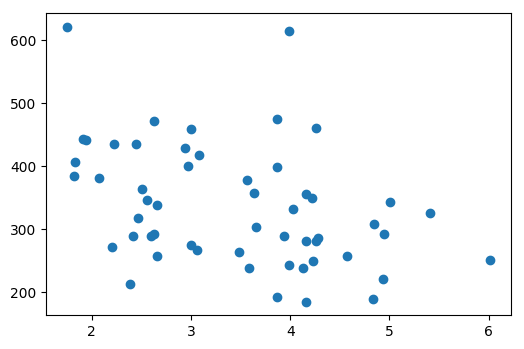

In [46]:
filt = lt220 & s_p
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], 'o')

print pearsonr(peaked['nsi'][filt], peaked['nu_p'][filt])
print pearsonr(np.log(peaked['nsi'][filt]), np.log(peaked['nu_p'][filt]))
print pearsonr(peaked['nsi'][filt], np.log(peaked['nu_p'][filt]))

print
print pearsonr(peaked['linear_size'][filt], peaked['nu_p_rest'][filt])
print pearsonr(np.log(peaked['linear_size'][filt]), np.log(peaked['nu_p_rest'][filt]))


In [48]:
peaked.write("peaked.vot", format='votable')

IOError: File exists: peaked.vot

In [49]:
odea = ascii.read("/home/jmorgan/Projects/ips/catalogs/odea.html", format='html')
print odea.colnames
gal = odea['ID'] == 'G'
qso = odea['ID'] == 'Q'


['Source', 'Catalog', 'Sample', 'ID', 'Mag', 'z', 's_5_ghz', 'theta', 'nu_m', 'p_5_ghz', 'size', 'nu_m_rest']


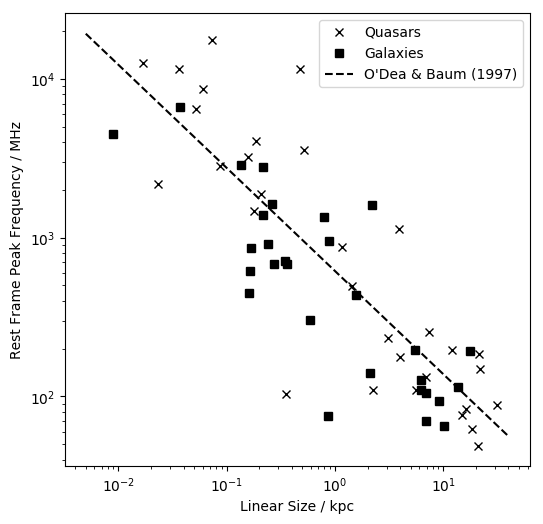

In [54]:
x = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 200)

plt.figure(figsize=(6.0, 6.0))
plt.plot(odea['size'][qso], odea['nu_m_rest'][qso], 'x', color='black', label='Quasars')
plt.plot(odea['size'][gal], odea['nu_m_rest'][gal], 's', color='black', label='Galaxies')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Rest Frame Peak Frequency / MHz")
plt.xlabel("Linear Size / kpc")
plt.plot(x, 10**(-0.21+3)*x**-0.65, color='black', linestyle = '--', Label="O'Dea & Baum (1997)")
plt.legend()
plt.savefig("Odea.pdf")

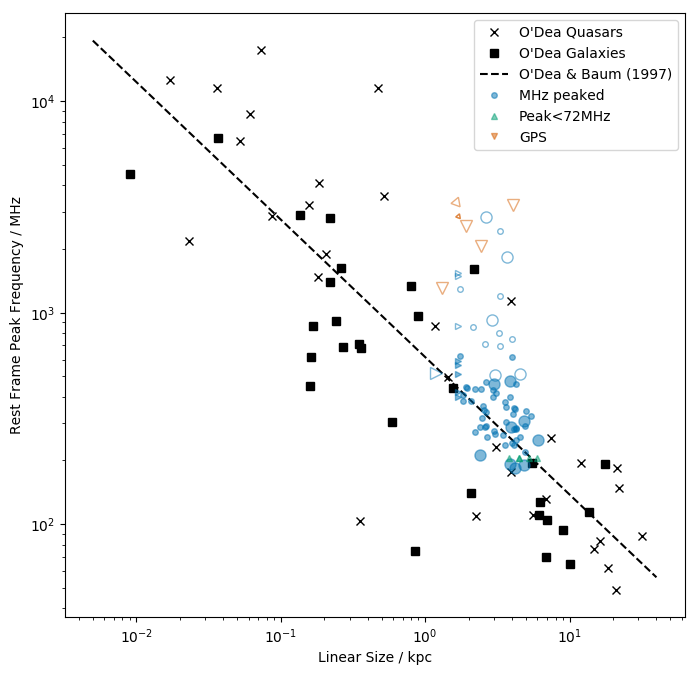

In [53]:
xlim = [0.005, 40]
ylim = [60, 20e3]
x = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 200)

bigsize=8
smallsize=4
markeredgewidth=1
plt.figure(figsize=(8.0, 8.0))

plt.plot(odea['size'][qso], odea['nu_m_rest'][qso], 'x', color='black', label="O'Dea Quasars")
plt.plot(odea['size'][gal], odea['nu_m_rest'][gal], 's', color='black', label="O'Dea Galaxies")
plt.plot(x, 10**(-0.21+3)*x**-0.65, color='black', linestyle = '--', Label="O'Dea & Baum (1997)")

# known z, not size upper limit
filt = z_p & s_p & lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], 'o', markersize=bigsize, alpha=0.5, 
         label='_nolegend_', color=COLORS[1], markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = z_p & s_p & ~lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], 'o', markersize=bigsize, alpha=0.5, 
         label='_nolegend_', color='none', markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)

filt = z_g & s_g
plt.plot(gps['linear_size'][filt], gps['nu_p_rest'][filt], 'v', markersize=bigsize, alpha=0.5,
         label='_nolegend_', color='none', markeredgecolor=COLORS[5], markeredgewidth=markeredgewidth)


#unknown z, not size upper limit
filt = ~z_p & s_p & lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], 'o', markersize=smallsize, alpha=0.5, 
         label="MHz peaked", color=COLORS[1], markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = ~z_p & s_p & ~lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], 'o', markersize=smallsize, alpha=0.5, 
         label="_nolegend_", color='none', markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = s_l
plt.plot(low_peak['linear_size'][filt], low_peak['nu_p_rest'][filt], '^', markersize=smallsize, alpha=0.5,
         label="Peak<72MHz", color=COLORS[3], markeredgecolor=COLORS[3], markeredgewidth=markeredgewidth)
filt = ~z_g & s_g
plt.plot(gps['linear_size'][filt], gps['nu_p_rest'][filt], 'v', markersize=smallsize, alpha=0.5,
         label="GPS", color=COLORS[5], markeredgecolor=COLORS[5], markeredgewidth=markeredgewidth)

# known z, size upper limit
filt = z_p & ~s_p & lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], '>', markersize=bigsize, alpha=0.5, 
        label='_nolegend_', color=COLORS[1], markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = z_p & ~s_p & ~lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], '>', markersize=bigsize, alpha=0.5, 
        label='_nolegend_', color='none', markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = z_g & ~s_g
plt.plot(gps['linear_size'][filt], gps['nu_p_rest'][filt], marker=(3, 0, -20), markersize=bigsize, alpha=0.5,
        label='_nolegend_', color='none', markeredgecolor=COLORS[5], markeredgewidth=markeredgewidth)

#unknown z, size upper limit
filt = ~z_p & ~s_p & lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], '>', markersize=smallsize, alpha=0.5, 
        label='_nolegend_', color=COLORS[1], markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = ~z_p & ~s_p & ~lt220
plt.plot(peaked['linear_size'][filt], peaked['nu_p_rest'][filt], '>', markersize=smallsize, alpha=0.5, 
        label='_nolegend_', color='none', markeredgecolor=COLORS[1], markeredgewidth=markeredgewidth)
filt = ~z_g & ~s_g
plt.plot(gps['linear_size'][filt], gps['nu_p_rest'][filt], marker=(3, 0, -20), markersize=smallsize, alpha=0.5,
        label='_nolegend_', color='none', markeredgecolor=COLORS[5], markeredgewidth=markeredgewidth)

plt.xscale('log')
plt.yscale('log')
plt.ylabel("Rest Frame Peak Frequency / MHz")
plt.xlabel("Linear Size / kpc")
plt.legend()
#plt.xlim(xlim)
#plt.ylim(ylim)
plt.savefig("odea_rest_peak_linear_size.pdf")